In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reading data
df = pd.read_excel('./data/total_waste.xlsx')
print(df)

# Rename the Unnamed: 0 column to Countries
df.rename(columns={'Unnamed: 0': 'Countries'}, inplace=True)

# Creating a list with Unnamed columns
remove_cols = [col for col in df.columns if 'Unnamed' in col]

# Removing the Unnamed columns
df.drop(remove_cols, axis='columns', inplace=True)

# Replacing ":" with NaN value
df = df.replace(':', np.nan)

dtypes_dict = {
    'Countries': 'category', 
    '2004': 'float',
    '2006': 'float',
    '2008': 'float',
    '2010': 'float',
    '2012': 'float',
    '2014': 'float',
    '2016': 'float',
    '2018': 'float',
    '2020': 'float',
}

df = df.astype(dtypes_dict)

# Setting the countries name as the index
df.set_index('Countries', inplace=True)

# Keeping only the countries that we are comparing 
df = df.loc[['Ireland','Netherlands', 'Sweden', 'France', 'Denmark']]

print(df)

                                           Unnamed: 0        2004 Unnamed: 2  \
0           European Union - 27 countries (from 2020)  2248790000        NaN   
1           European Union - 28 countries (2013-2020)  2547590000        NaN   
2                                             Belgium    52809345        NaN   
3                                            Bulgaria   201020467        NaN   
4                                             Czechia    29275743        NaN   
5                                             Denmark    12588952        NaN   
6    Germany (until 1990 former territory of the FRG)   364021937        NaN   
7                                             Estonia    20860680        NaN   
8                                             Ireland    24499142        NaN   
9                                              Greece    33346962        NaN   
10                                              Spain   160668134        NaN   
11                                      

In [2]:
# Filling Nan values with the mean and changing the dataset so it looks more like a timeseries dataset
df = df.iloc[:, :].T.fillna(df.iloc[:, :].mean(axis='columns')).T
df_1 = df.T

# Creating a column name 'Time' for predicting steps
df_1['Time'] = np.arange(len(df_1.index))

print(df_1)

Countries     Ireland  Netherlands       Sweden       France     Denmark  Time
2004       24499142.0   92448121.0   91759469.0  296580889.0  12588952.0     0
2006       29599175.0   99166563.0   94971307.0  312297824.0  14703138.0     1
2008       22502816.0  102648605.0   86168590.0  345002210.0  15155208.0     2
2010       19807586.0  121145468.0  117645185.0  355081245.0  16217736.0     3
2012       12713021.0  121194466.0  156306504.0  344440922.0  16713822.0     4
2014       15166830.0  132362297.0  167026886.0  324462969.0  20808843.0     5
2016       15251689.0  141024020.0  141625718.0  322685297.0  20981931.0     6
2018       13986757.0  145245469.0  138667585.0  343307326.0  21445206.0     7
2020       16192033.0  125138771.0  151823910.0  310373987.0  20135564.0     8


In [3]:
# Training data
#---------------

# Selecting time as the feature to train the model
X = df_1.loc[:, ['Time']]  # features

# Creating a copy of X and adding the steps to predict until 2030
X_2 = X.copy()
X_2.loc['2022'] = 9
X_2.loc['2024'] = 10
X_2.loc['2026'] = 11
X_2.loc['2028'] = 12
X_2.loc['2030'] = 13

# Selecting the target for prediction
y_Ireland = df_1.loc[:, 'Ireland'] 
y_Netherlands = df_1.loc[:, 'Netherlands']
y_Sweden = df_1.loc[:, 'Sweden']
y_France = df_1.loc[:, 'France']
y_Denmark = df_1.loc[:, 'Denmark']

# Train the model
model_Ireland = LinearRegression()
model_Ireland.fit(X, y_Ireland)

model_Netherlands = LinearRegression()
model_Netherlands.fit(X, y_Netherlands)

model_Sweden = LinearRegression()
model_Sweden.fit(X, y_Sweden)

model_France = LinearRegression()
model_France.fit(X, y_France)

model_Denmark = LinearRegression()
model_Denmark.fit(X, y_Denmark)

# Predicting 
y_Ireland_pred = pd.Series(model_Ireland.predict(X_2), index=X_2.index)

y_Netherlands_pred = pd.Series(model_Netherlands.predict(X_2), index=X_2.index)

y_Sweden_pred = pd.Series(model_Sweden.predict(X_2), index=X_2.index)

y_France_pred = pd.Series(model_France.predict(X_2), index=X_2.index)

y_Denmark_pred = pd.Series(model_Denmark.predict(X_2), index=X_2.index)

In [4]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

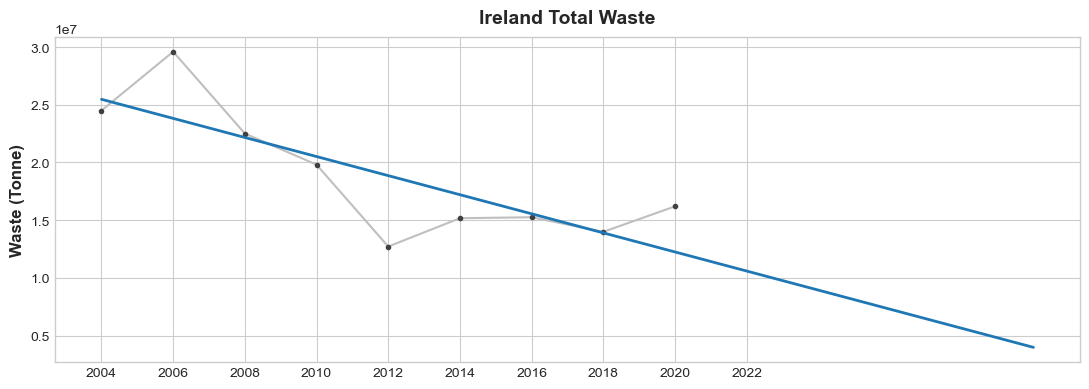

In [5]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Ireland.plot(**plot_params)
ax = y_Ireland_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Ireland Total Waste');

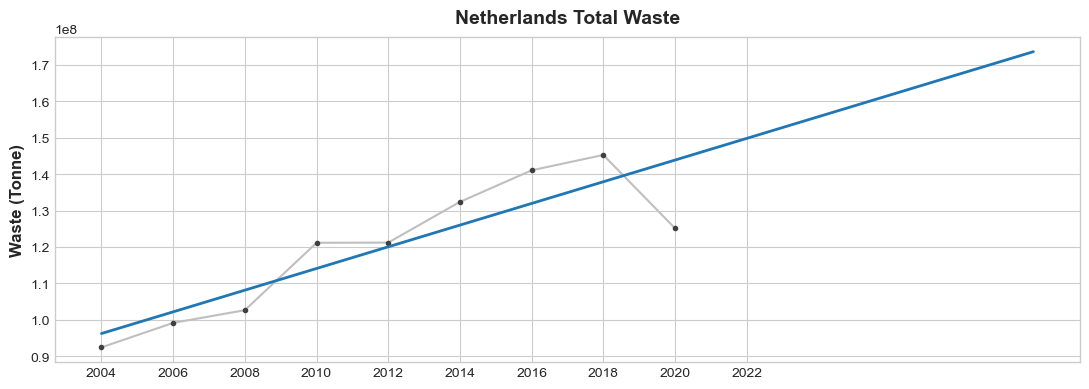

In [6]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Netherlands.plot(**plot_params)
ax = y_Netherlands_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Netherlands Total Waste');

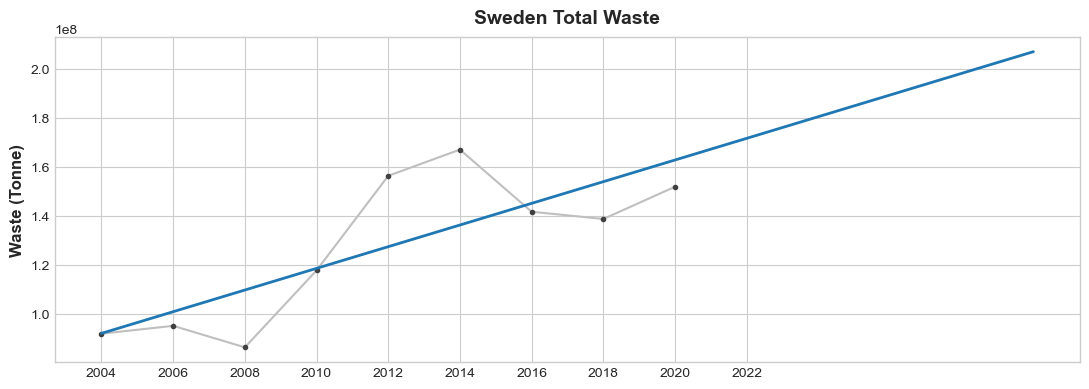

In [7]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Sweden.plot(**plot_params)
ax = y_Sweden_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Sweden Total Waste');

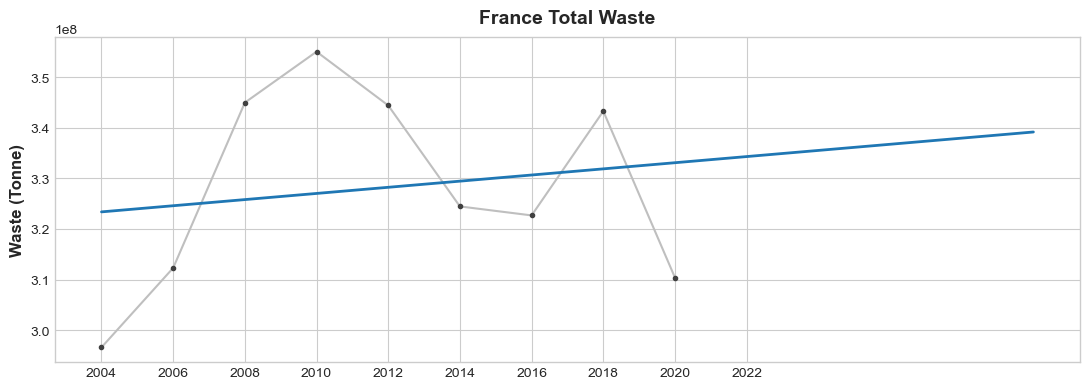

In [8]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_France.plot(**plot_params)
ax = y_France_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('France Total Waste');

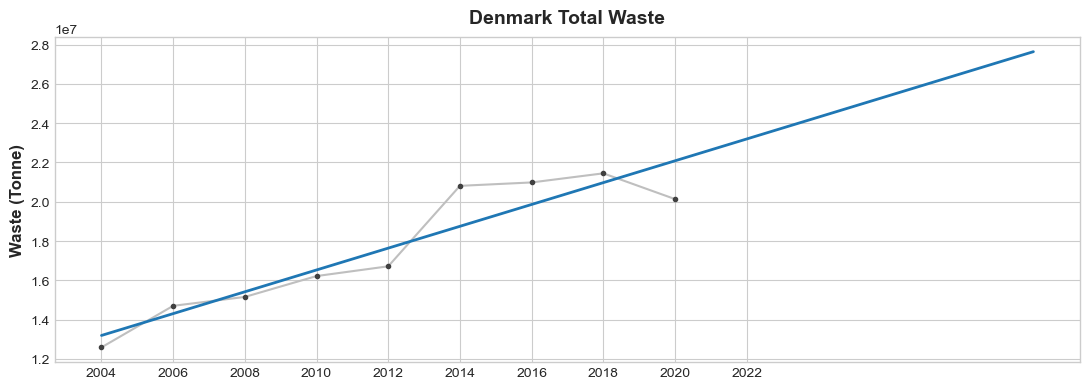

In [9]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Denmark.plot(**plot_params)
ax = y_Denmark_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Denmark Total Waste');

In [10]:
# Creating a list for each country with the predicted values
waste_Ireland = [df_1.loc['2010', 'Ireland'], df_1.loc['2020', 'Ireland'], y_Ireland_pred.values[13]]
waste_Netherlands = [df_1.loc['2010', 'Netherlands'], df_1.loc['2020', 'Netherlands'], y_Netherlands_pred.values[13]]
waste_Sweden = [df_1.loc['2010', 'Sweden'], df_1.loc['2020', 'Sweden'], y_Sweden_pred.values[13]]
waste_France = [df_1.loc['2010', 'France'], df_1.loc['2020', 'France'], y_France_pred.values[13]]
waste_Denmark = [df_1.loc['2010', 'Denmark'], df_1.loc['2020', 'Denmark'], y_Denmark_pred.values[13]]

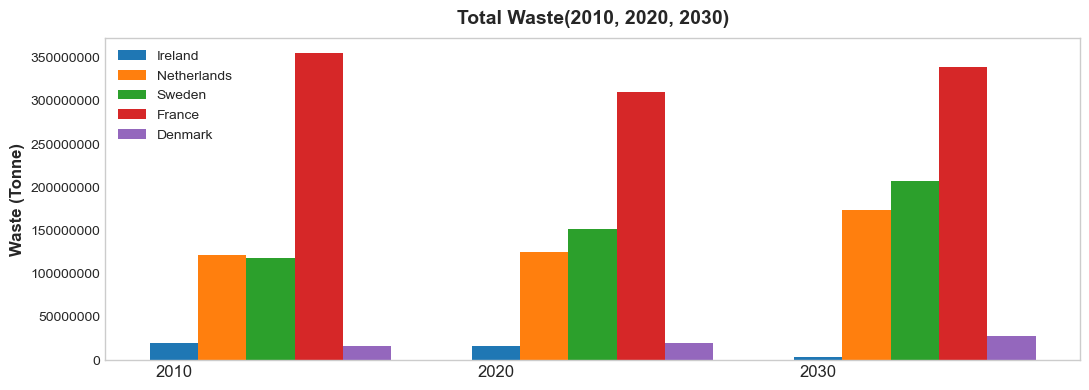

In [11]:
# Plotting the comparision of the years 2010, 2020 and 2030 of every country
width =0.15
labels = ['2010', '2020', '2030']
plt.bar(np.arange(len(waste_Ireland)), waste_Ireland, width=width)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.bar(np.arange(len(waste_Netherlands))+ width, waste_Netherlands, width=width)
plt.bar(np.arange(len(waste_Sweden))+ (2*width), waste_Sweden, width=width)
plt.bar(np.arange(len(waste_France))+ (3*width), waste_France, width=width)
plt.bar(np.arange(len(waste_Denmark))+ (4*width), waste_Denmark, width=width)
plt.xticks(range(len(waste_Sweden)), labels, fontsize=12)
plt.ylabel('Waste (Tonne)', fontsize=12)
plt.legend(labels=['Ireland', 'Netherlands', 'Sweden', 'France', 'Denmark'], loc='upper left')
plt.title("Total Waste(2010, 2020, 2030)")
plt.grid(False)
plt.show()